In [1]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
#checking available GPUs
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("data/clocks.csv")
df.head()

,class index,filepaths,labels,data set
0,0,train/1-00/0.jpg,1_00,train
1,0,train/1-00/1.jpg,1_00,train
2,0,train/1-00/11.jpg,1_00,train
3,0,train/1-00/12.jpg,1_00,train
4,0,train/1-00/13.jpg,1_00,train


In [6]:
df[df['data set'] == 'train']

,class index,filepaths,labels,data set
0,0,train/1-00/0.jpg,1_00,train
1,0,train/1-00/1.jpg,1_00,train
2,0,train/1-00/11.jpg,1_00,train
3,0,train/1-00/12.jpg,1_00,train
4,0,train/1-00/13.jpg,1_00,train
...,...,...,...,...
11515,143,train/9-55/93.jpg,9_55,train
11516,143,train/9-55/94.jpg,9_55,train
11517,143,train/9-55/96.jpg,9_55,train
11518,143,train/9-55/97.jpg,9_55,train


In [7]:
df[df['data set'] == 'train']['labels'].value_counts()

1_00    80
1_05    80
5_40    80
5_45    80
5_50    80
        ..
2_00    80
2_05    80
2_10    80
2_15    80
9_55    80
Name: labels, Length: 144, dtype: int64

### so the dataset is balanced

### importing the dataset from directory as batch object

In [9]:
img_size = 200

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='data/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(img_size, img_size),
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='data/valid',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(img_size, img_size),
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory='data/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(img_size, img_size),
)

Found 11520 files belonging to 144 classes.
Found 1440 files belonging to 144 classes.
Found 1440 files belonging to 144 classes.


In [10]:
class_names = sorted(os.listdir("data/train"))
class_names

['1-00',
 '1-05',
 '1-10',
 '1-15',
 '1-20',
 '1-25',
 '1-30',
 '1-35',
 '1-40',
 '1-45',
 '1-50',
 '1-55',
 '10-00',
 '10-05',
 '10-10',
 '10-15',
 '10-20',
 '10-25',
 '10-30',
 '10-35',
 '10-40',
 '10-45',
 '10-50',
 '10-55',
 '11-00',
 '11-05',
 '11-10',
 '11-15',
 '11-20',
 '11-25',
 '11-30',
 '11-35',
 '11-40',
 '11-45',
 '11-50',
 '11-55',
 '12-00',
 '12-05',
 '12-10',
 '12-15',
 '12-20',
 '12-25',
 '12-30',
 '12-35',
 '12-40',
 '12-45',
 '12-50',
 '12-55',
 '2-00',
 '2-05',
 '2-10',
 '2-15',
 '2-20',
 '2-25',
 '2-30',
 '2-35',
 '2-40',
 '2-45',
 '2-50',
 '2-55',
 '3-00',
 '3-05',
 '3-10',
 '3-15',
 '3-20',
 '3-25',
 '3-30',
 '3-35',
 '3-40',
 '3-45',
 '3-50',
 '3-55',
 '4-00',
 '4-05',
 '4-10',
 '4-15',
 '4-20',
 '4-25',
 '4-30',
 '4-35',
 '4-40',
 '4-45',
 '4-50',
 '4-55',
 '5-00',
 '5-05',
 '5-10',
 '5-15',
 '5-20',
 '5-25',
 '5-30',
 '5-35',
 '5-40',
 '5-45',
 '5-50',
 '5-55',
 '6-00',
 '6-05',
 '6-10',
 '6-15',
 '6-20',
 '6-25',
 '6-30',
 '6-35',
 '6-40',
 '6-45',
 '6-50',
 

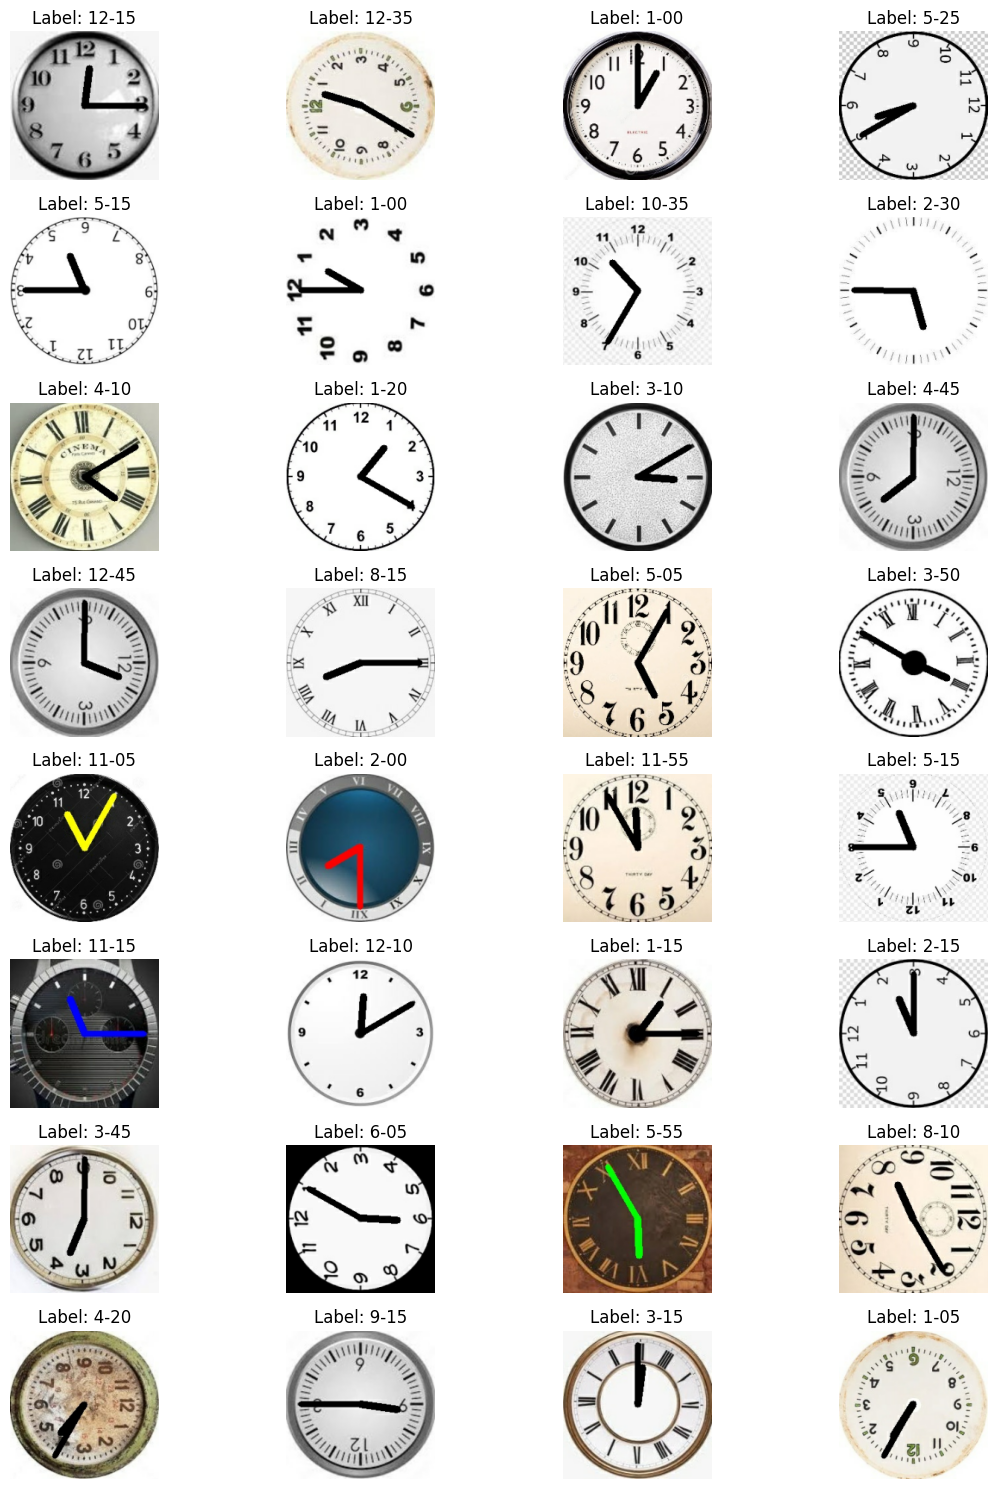

In [11]:
# Get a batch of images and labels from the dataset
for images, labels in train_ds:
    break
    
# Plot the all images in the 1st batch
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(12, 15))
for i, ax in enumerate(axes.flat):
    if i < 32:
        ax.imshow(images[i].numpy().astype('uint8'))
        ax.set_title('Label: {}'.format(class_names[np.argmax(labels[i])]))
        ax.axis('off')
plt.tight_layout()
plt.show()

In [12]:
#Normalizing the data
def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label 

In [13]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)
test_ds = test_ds.map(process)

### building the neural network

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding = 'valid', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(144, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_ds, epochs=20, validation_data = validation_ds)

Epoch 1/20


2023-04-08 13:49:03.228861: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-04-08 13:49:04.721409: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-08 13:49:04.722165: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-08 13:49:04.722204: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-04-08 13:49:04.722919: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-08 13:49:04.723000: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-08 13:49:06.273507: I tensorflow/stream_executor/cuda/c

360/360 [==============================] - 23s 46ms/step - loss: 2.9470 - accuracy: 0.3892 - val_loss: 0.7617 - val_accuracy: 0.8257
Epoch 2/20
360/360 [==============================] - 17s 46ms/step - loss: 0.6327 - accuracy: 0.8674 - val_loss: 0.5048 - val_accuracy: 0.8986
Epoch 3/20
360/360 [==============================] - 17s 47ms/step - loss: 0.4425 - accuracy: 0.9110 - val_loss: 0.3695 - val_accuracy: 0.9264
Epoch 4/20
360/360 [==============================] - 16s 44ms/step - loss: 0.3543 - accuracy: 0.9277 - val_loss: 0.1939 - val_accuracy: 0.9563
Epoch 5/20
360/360 [==============================] - 14s 39ms/step - loss: 0.1094 - accuracy: 0.9721 - val_loss: 0.0925 - val_accuracy: 0.9812
Epoch 6/20
360/360 [==============================] - 14s 39ms/step - loss: 0.0722 - accuracy: 0.9837 - val_loss: 0.0599 - val_accuracy: 0.9826
Epoch 7/20
360/360 [==============================] - 16s 45ms/step - loss: 0.0325 - accuracy: 0.9931 - val_loss: 0.0533 - val_accuracy: 0.9861
Epo

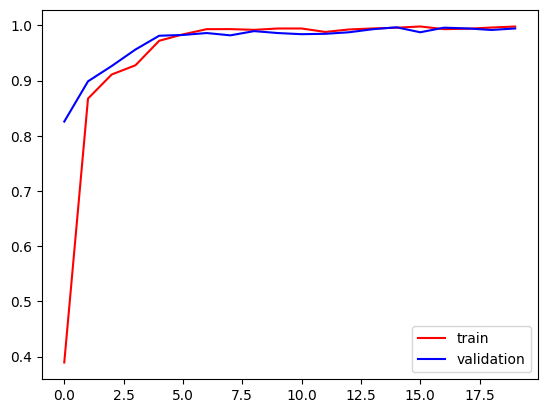

In [18]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

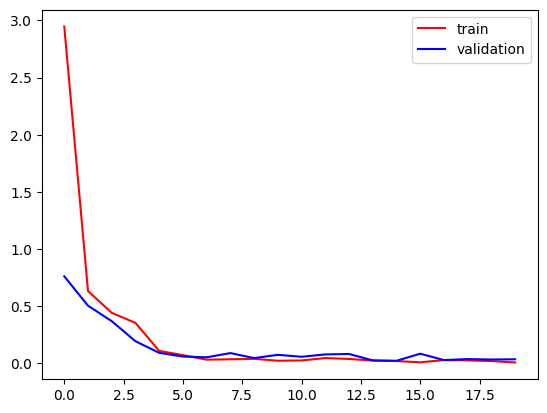

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## checking performance with the test dataset

In [20]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_ds)

45/45 [==============================] - 1s 23ms/step - loss: 0.0249 - accuracy: 0.9944


In [21]:
print("Loss in test dataset: ", np.round(loss, 4))
print("Accuracy in test dataset: ", np.round(accuracy, 4))

Loss in test dataset:  0.0249
Accuracy in test dataset:  0.9944


### checking performance with on erandom image from test_ds

In [22]:
# test_images = np.concatenate([[x,y] for x, y in test_ds], axis=0)
for images, labels in test_ds:
    input_data = images[13]
    output_label = labels[13]

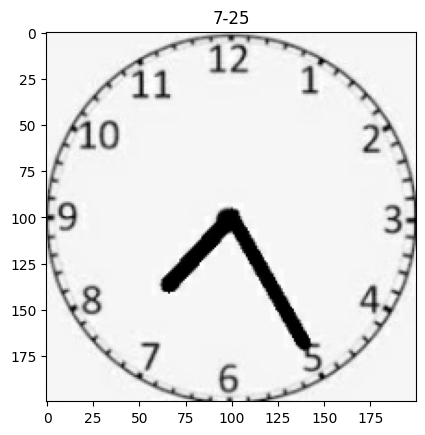

In [23]:
plt.imshow(input_data)
plt.title(class_names[np.argmax(output_label)])
plt.show()

In [24]:
prediction = model.predict(np.array(input_data).reshape(1,img_size,img_size,3))

1/1 [==============================] - 0s 129ms/step


In [25]:
#checking the class of the prediction 
class_names[np.argmax(prediction)]

'7-25'